In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
!pwd

/data/angelacao/ontological-scaffolding/scripts/csc511_project1


In [7]:
no_cot_df = pd.read_csv("outs/arithmetic_fewshot_zeroshot_outs.csv")
no_cot_df.sample(3)

,answer,id,zero_shot,few_shot
398,9.0,chal-399,3.5,12.0
997,220.0,chal-998,19.5,16.5
372,3.0,chal-373,17.0,1.6


In [8]:
cot_df = pd.read_csv("outs/arithmetic_fewshot_zeroshot_cot_outs.csv")
cot_df.sample(3)

,answer,id,zero_shot,few_shot,zero_shot_cot,few_shot_cot
412,98.0,chal-413,NaN,NaN,40.0,35.500000
730,6.0,chal-731,NaN,NaN,53.0,22.572917
892,9.0,chal-893,NaN,NaN,60.0,61.042944


In [9]:
twoshot_df = pd.read_csv("outs/arithmetic_twoshot_cot_outs.csv")
twoshot_df.sample(3)

,answer,id,two_shot_cot
289,745.0,chal-290,55200.000000
45,32.0,chal-46,56.072827
35,1.0,chal-36,4.000000


           id   zero_shot  few_shot  zero_shot_cot  few_shot_cot  answer  \
300  chal-301   87.000000      35.0      100.00000          28.0    28.0   
708  chal-709   49.000000      58.0        9.00000           7.0     9.0   
915  chal-916  468.468468     385.0      485.06123         253.0   253.0   

     two_shot_cot  
300        28.000  
708         8.000  
915      4850.232  


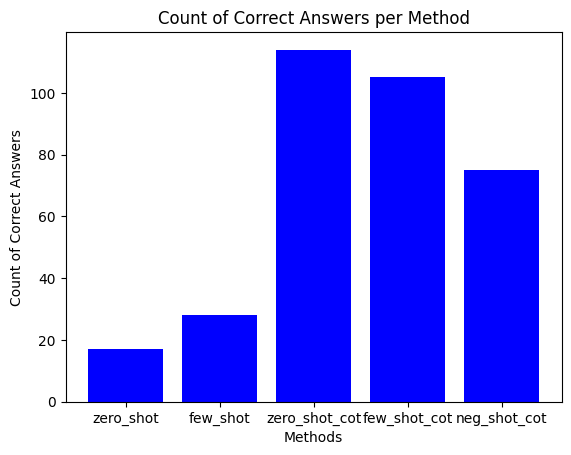

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframes
no_cot_df = pd.read_csv("outs/arithmetic_fewshot_zeroshot_outs.csv")
cot_df = pd.read_csv("outs/arithmetic_fewshot_zeroshot_cot_outs.csv")
twoshot_df = pd.read_csv("outs/arithmetic_twoshot_cot_outs.csv")

# Merge the dataframes based on the 'id' column
merged_df = no_cot_df.merge(cot_df, on="id", how="outer").merge(twoshot_df, on="id", how="outer")

# List of columns to compare with 'answer'
columns_to_compare = ["zero_shot", "few_shot", "zero_shot_cot", "few_shot_cot", "two_shot_cot"]

# Drop redundant columns
merged_df.drop(columns=['answer_x', 'answer_y', 'zero_shot_y', 'few_shot_y'], inplace=True)

# Rename columns for clarity
merged_df = merged_df.rename(columns={"zero_shot_x": "zero_shot", "few_shot_x": "few_shot"})

# Display a sample of the merged DataFrame
print(merged_df.sample(3))

# Count matches with 'answer' column
match_counts = {col: (merged_df[col] == merged_df['answer']).sum() for col in columns_to_compare}

# Replace "two_shot_cot" with "neg_shot_cot" in the match_counts dictionary
match_counts['neg_shot_cot'] = match_counts.pop('two_shot_cot')

# Plot the match counts as a bar chart
plt.bar(match_counts.keys(), match_counts.values(), color='blue')
plt.xlabel('Methods')
plt.ylabel('Count of Correct Answers')
plt.title('Count of Correct Answers per Method')

# Show the plot
plt.show()
